In [1]:
#Shubham Nigam
#19A1HP071

In [2]:
#Question 3

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
customers_df = pd.read_csv(r"C:\Users\Shubham\Desktop\Codes\OneDrive_2020-09-21 (1)\MLAP ET DATASETS 21 Sep 2020\2_customerspends.csv" )
customers_df= customers_df.drop('Customer', axis=1)
customers_df.head( 5 )

,Apparel,Beauty and Healthcare
0,21.10,0.7
1,15.23,5.5
2,5.22,18.6
3,31.10,1.8
4,6.12,21.5


In [6]:
import pandas as pd
import numpy as np # improting librabry for numerical operations
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

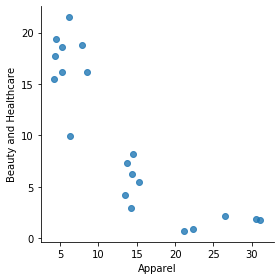

In [7]:
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customers_df, fit_reg = False, size = 4 ); #Creating a scatter plot
#plt.title( "Fig 1: Customer Segments Based on Apparel & Beauty and Healthcare");

In [8]:
# K means clustering 

In [9]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
customers_df["clusterid"] = clusters.labels_
customers_df[0:5]

,Apparel,Beauty and Healthcare,clusterid
0,21.10,0.7,2
1,15.23,5.5,1
2,5.22,18.6,0
3,31.10,1.8,2
4,6.12,21.5,0


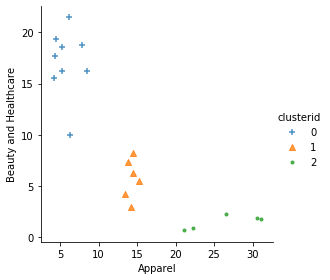

In [11]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",data=customers_df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 );

In [15]:
from sklearn.preprocessing import StandardScaler  # importing standar scalar amd using it to normalize 
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["Apparel", "Beauty and Healthcare"]] )
scaled_customers_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [16]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=62 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

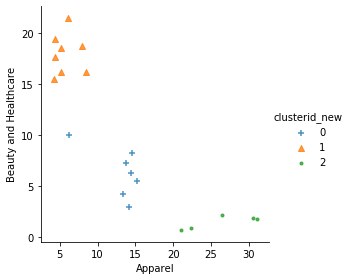

In [17]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",data=customers_df,hue = "clusterid_new",fit_reg=False,markers = markers,size = 4 );
#plt.title( "Fig 3: Customer segments created after normalization");

In [18]:
clusters.cluster_centers_

array([[ 5.79777778, 17.09777778],
       [14.24666667,  5.73      ],
       [26.32      ,  1.5       ]])

In [19]:
customers_df.groupby( 'clusterid' )['Apparel','Beauty and Healthcare'].agg( ["mean",'std'] ).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0   5.797778  1.549006             17.097778  3.260068
1         1  14.246667  0.635662              5.730000  1.963212
2         2  26.320000  4.599130              1.500000  0.659545

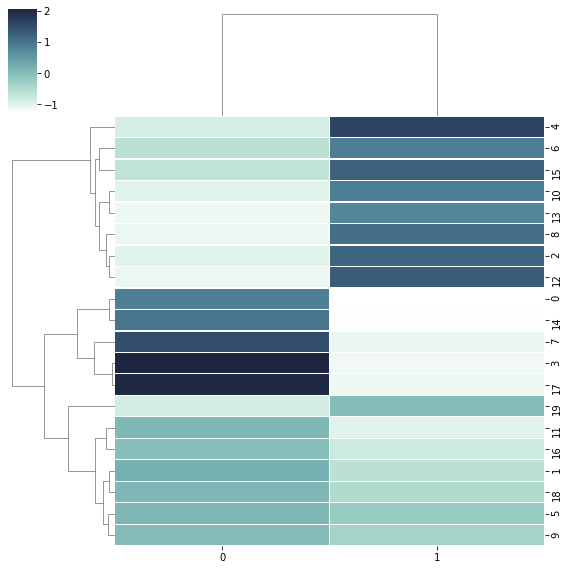

In [20]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customers_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram");

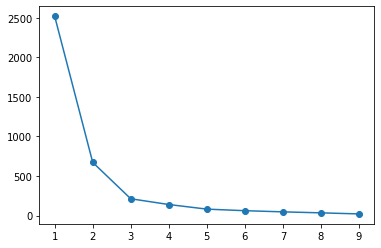

In [21]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( customers_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [22]:
#  from both dendogram and elbo diagram is shows that there are 3 clusturs

In [23]:
# Creating clustures

In [24]:
k = 3
clusters = KMeans( k, random_state = 62 )
clusters.fit( scaled_customers_df )
customers_df["clusterid"] = clusters.labels_

In [25]:
customers_df[customers_df.clusterid == 0]#Cluster 0 (high sepends on apparel medium on beauty)

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
1,15.23,5.50,0,0
5,14.50,8.20,0,0
9,13.75,7.30,0,0
11,14.20,2.90,0,0
16,13.40,4.20,0,0
18,14.40,6.28,0,0
19,6.25,9.98,0,0


In [26]:
customers_df[customers_df.clusterid == 1] #Cluster 1  (low sepends on apparel high on beauty)

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
2,5.22,18.6,1,1
4,6.12,21.5,1,1
6,8.50,16.2,1,1
8,4.34,17.7,1,1
10,5.20,16.2,1,1
12,4.40,19.4,1,1
13,4.25,15.5,1,1
15,7.90,18.8,1,1


In [27]:
customers_df[customers_df.clusterid == 2] # Cluster 2 (high sepends on apparel low on beauty)

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
0,21.1,0.7,2,2
3,31.1,1.8,2,2
7,26.5,2.2,2,2
14,22.3,0.9,2,2
17,30.6,1.9,2,2
